## Step 1: Reading and Understanding the Data

In [114]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the data

bike_sharing_data = pd.read_csv('day.csv')

In [4]:
# Checking the heads of the dataset
 
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of dataframe

bike_sharing_data.shape

(730, 16)

In [6]:
# describing the columns of dataframe

bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# getting information of the columns

bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# checking null values in column data

bike_sharing_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Renaming some of the columns for better understanding

bike_sharing_data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [10]:
# Checking the heads of the dataset to make sure of the changes

bike_sharing_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Copying the dataframe into new

bike_sharing_data_copy = bike_sharing_data.copy()

In [12]:
# checking the shape of new dataframe

bike_sharing_data_copy.shape

(730, 16)

In [13]:
# dropping the duplicates

bike_sharing_data_copy.drop_duplicates(inplace=True)

In [14]:
# re-verifying the shape of new dataframe

bike_sharing_data_copy.shape

(730, 16)

#### The consistent shape of the DataFrame post dropping duplicates implies the absence of duplicates in the original dataset.

In [15]:
# We are getting rid of some columns we don't need. 
# "Instant" is just an index for each row, "dteday" contains the date, but we can use "year" and "month" instead.
# "Casual" and "registered" seem to be parts of the total count ("cnt").

bike_sharing_data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [16]:
# Converting the "season" column into numerical values

bike_sharing_data.season = bike_sharing_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [17]:
# Converting the "month" column into numerical values

bike_sharing_data.month = bike_sharing_data.month.map({1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'})

In [18]:
# Assigning numerical values to the categories in the "weekday" column

bike_sharing_data.weekday = bike_sharing_data.weekday.map({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})

In [19]:
# Converting the "weathersit" column into numerical values 

bike_sharing_data.weathersit = bike_sharing_data.weathersit.map({1:'Clear',2:'Misty',3:'Rainy_Windy',4:'Harsh'})

In [20]:
# checkin the head of the dataset

bike_sharing_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,january,0,monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
# checking the column information of the dataset

bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

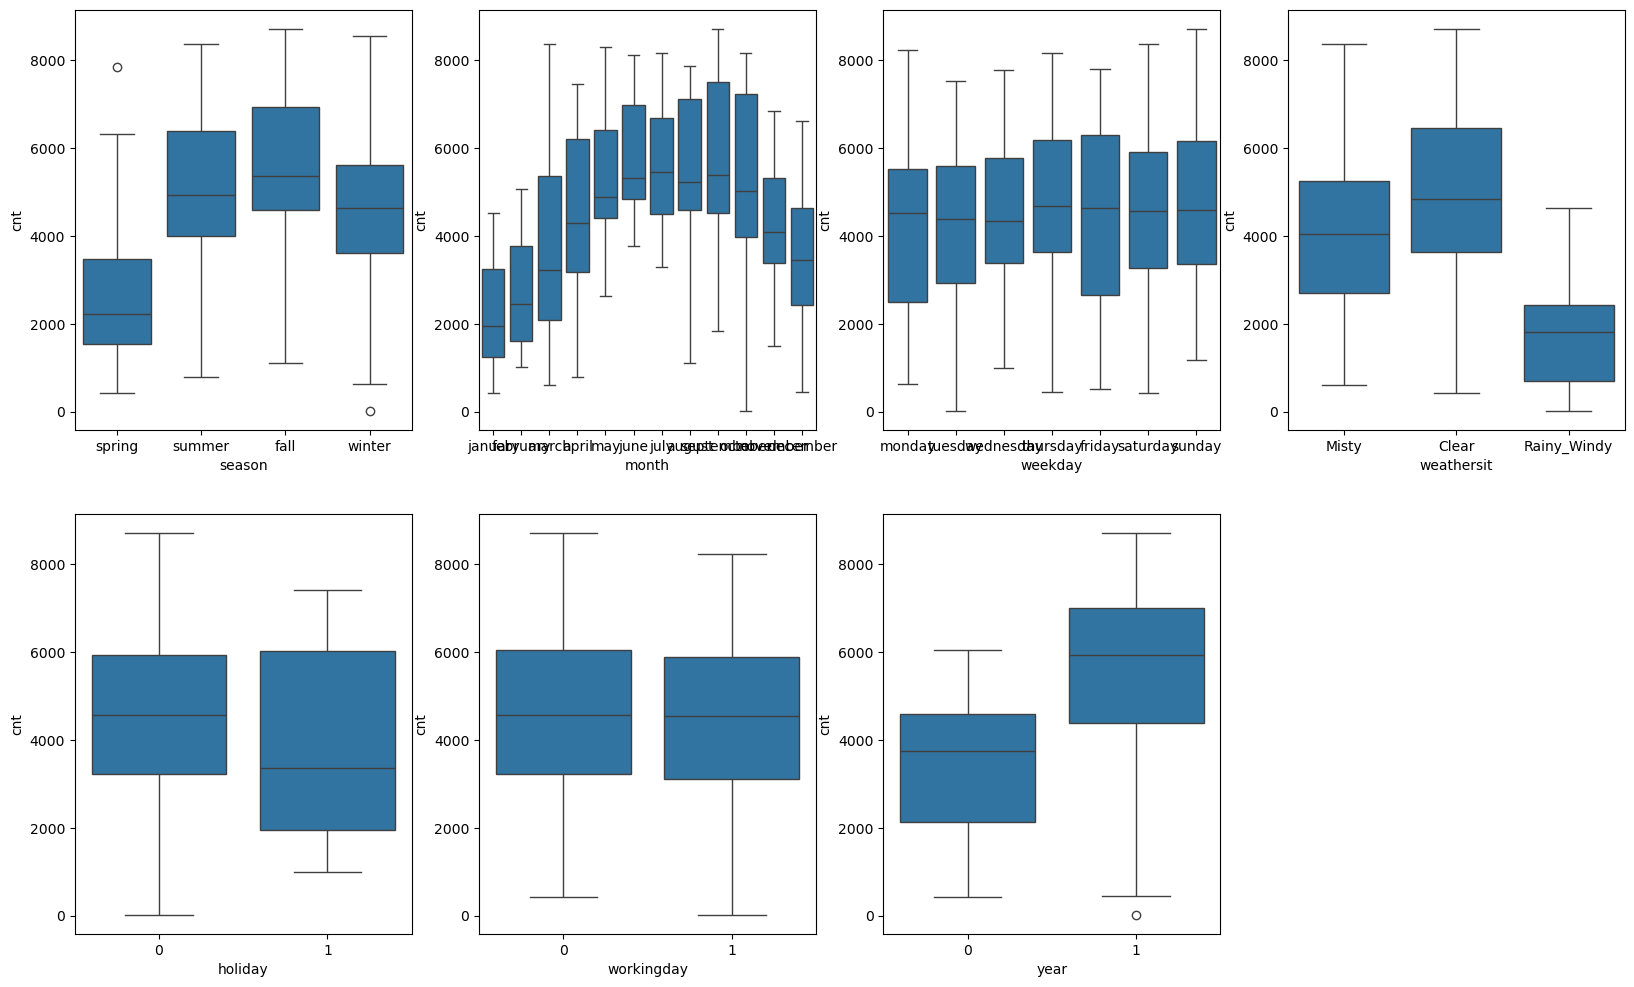

In [22]:
# Looking at and plotting categorical columns to understand how they relate to the target variable.

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike_sharing_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike_sharing_data)
plt.show()

In [34]:
# Designing a function to generate barplots for categorical columns.

def plot_cat_columns(column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=bike_sharing_data)
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=bike_sharing_data, hue='year', palette='Set1')
    plt.legend(labels=['2018', '2019'])



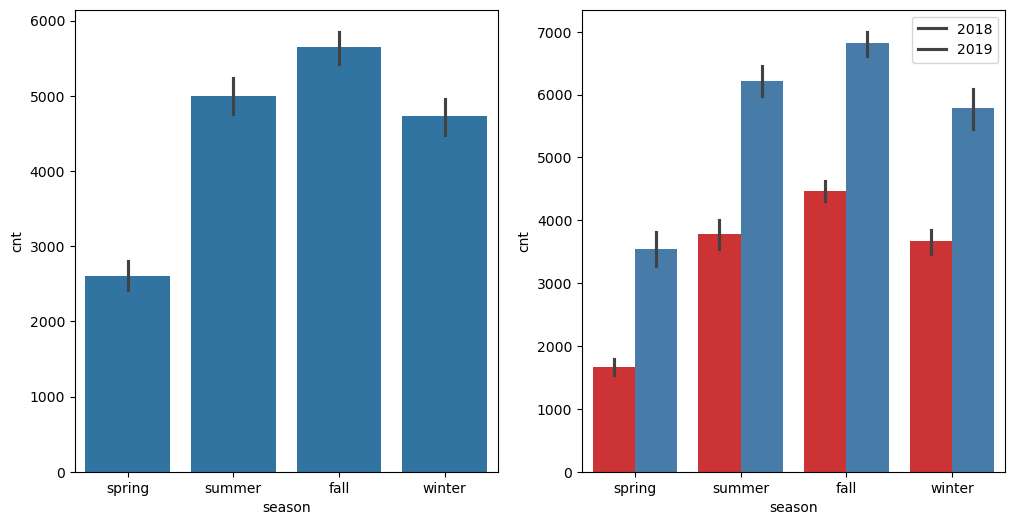

In [35]:
# plotting visualization for "season" column

plot_cat_columns('season')

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

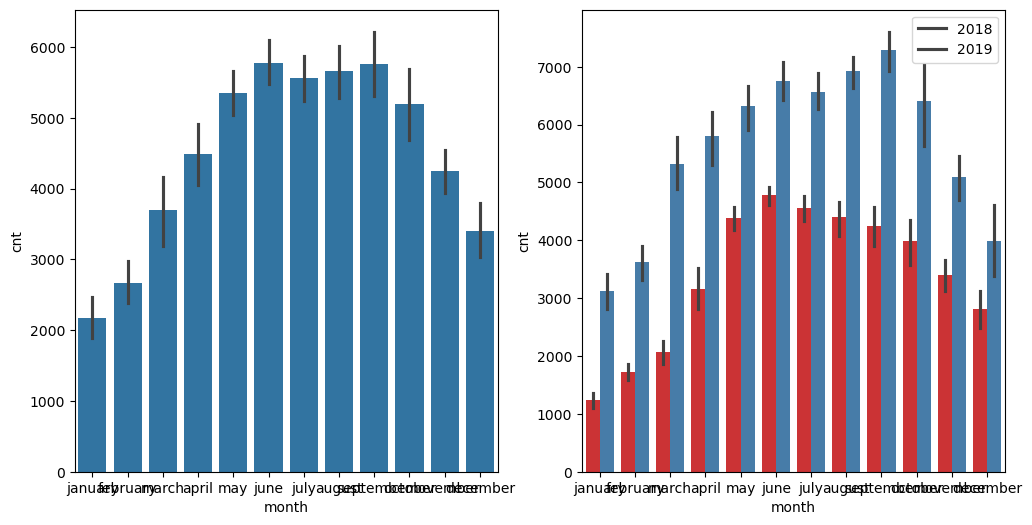

In [36]:
# plotting visualization for "month" column

plot_cat_columns('month')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year.
Number of booking for each month seems to have increased from 2018 to 2019.

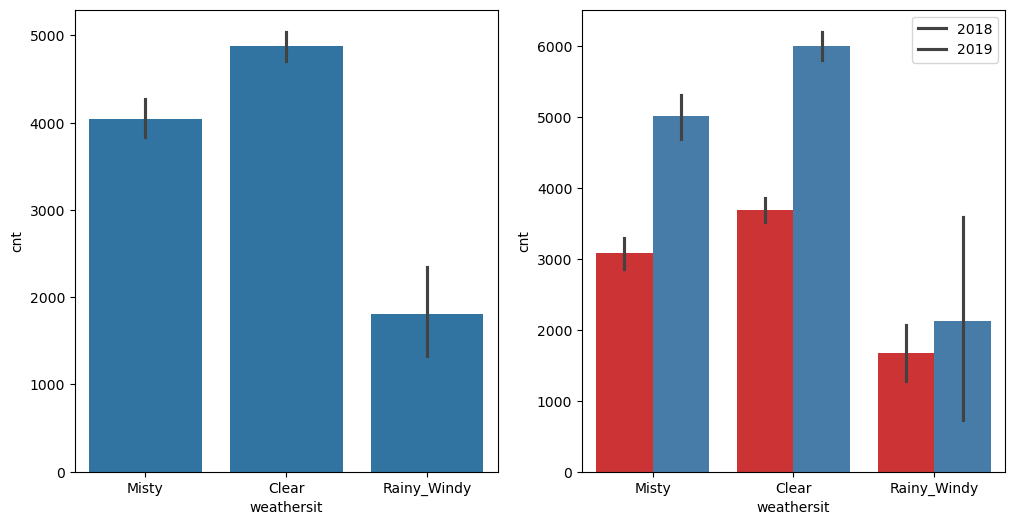

In [37]:
# plotting visualization for "weathersit" column

plot_cat_columns('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

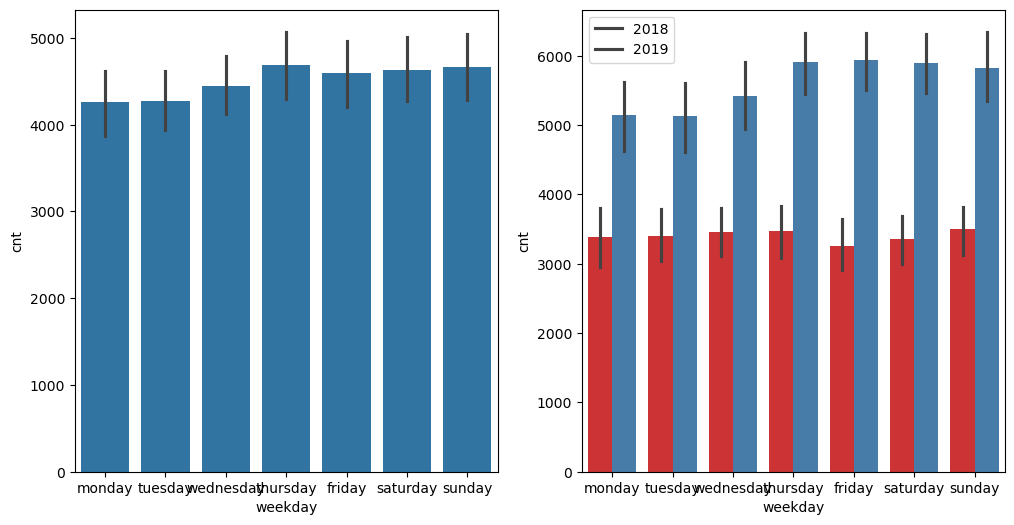

In [38]:
# plotting visualization for "weekday" column

plot_cat_columns('weekday')

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

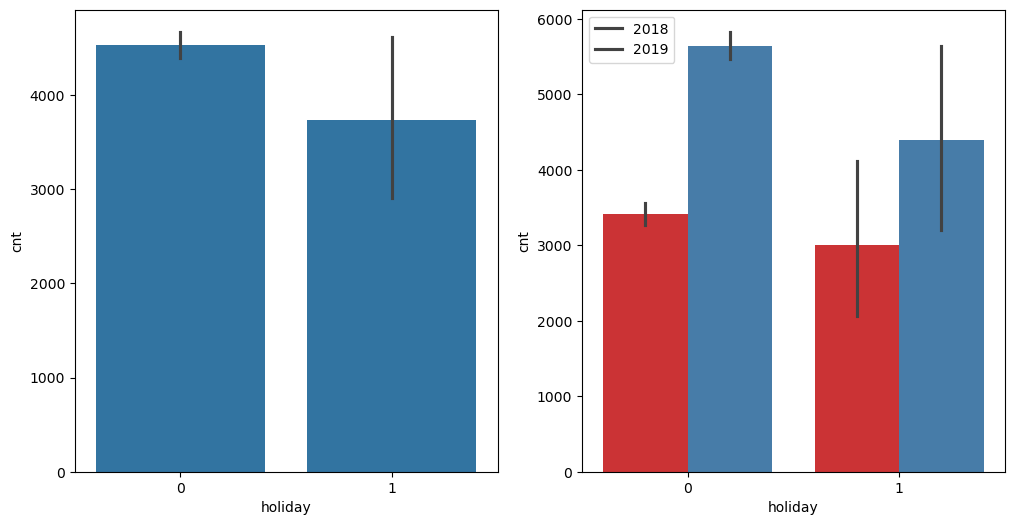

In [39]:
# plotting visualization for "holiday" column

plot_cat_columns('holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

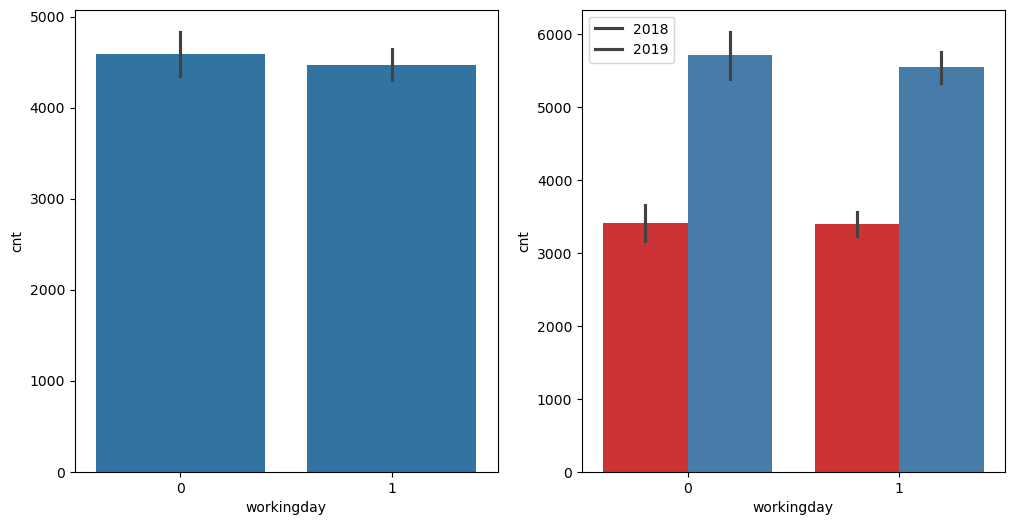

In [40]:
# plotting visualization for "workingday" column

plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

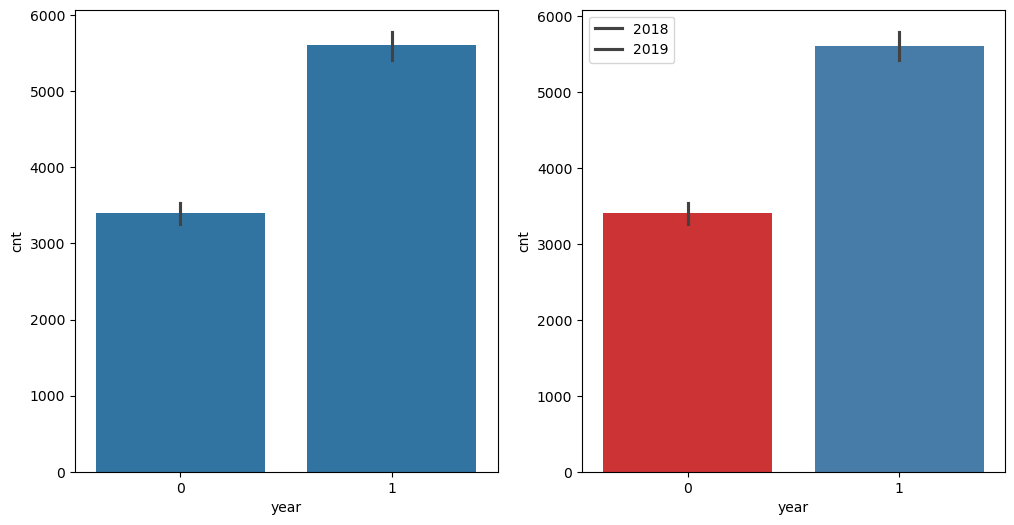

In [41]:
# plotting visualization for "year" column

plot_cat_columns('year')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

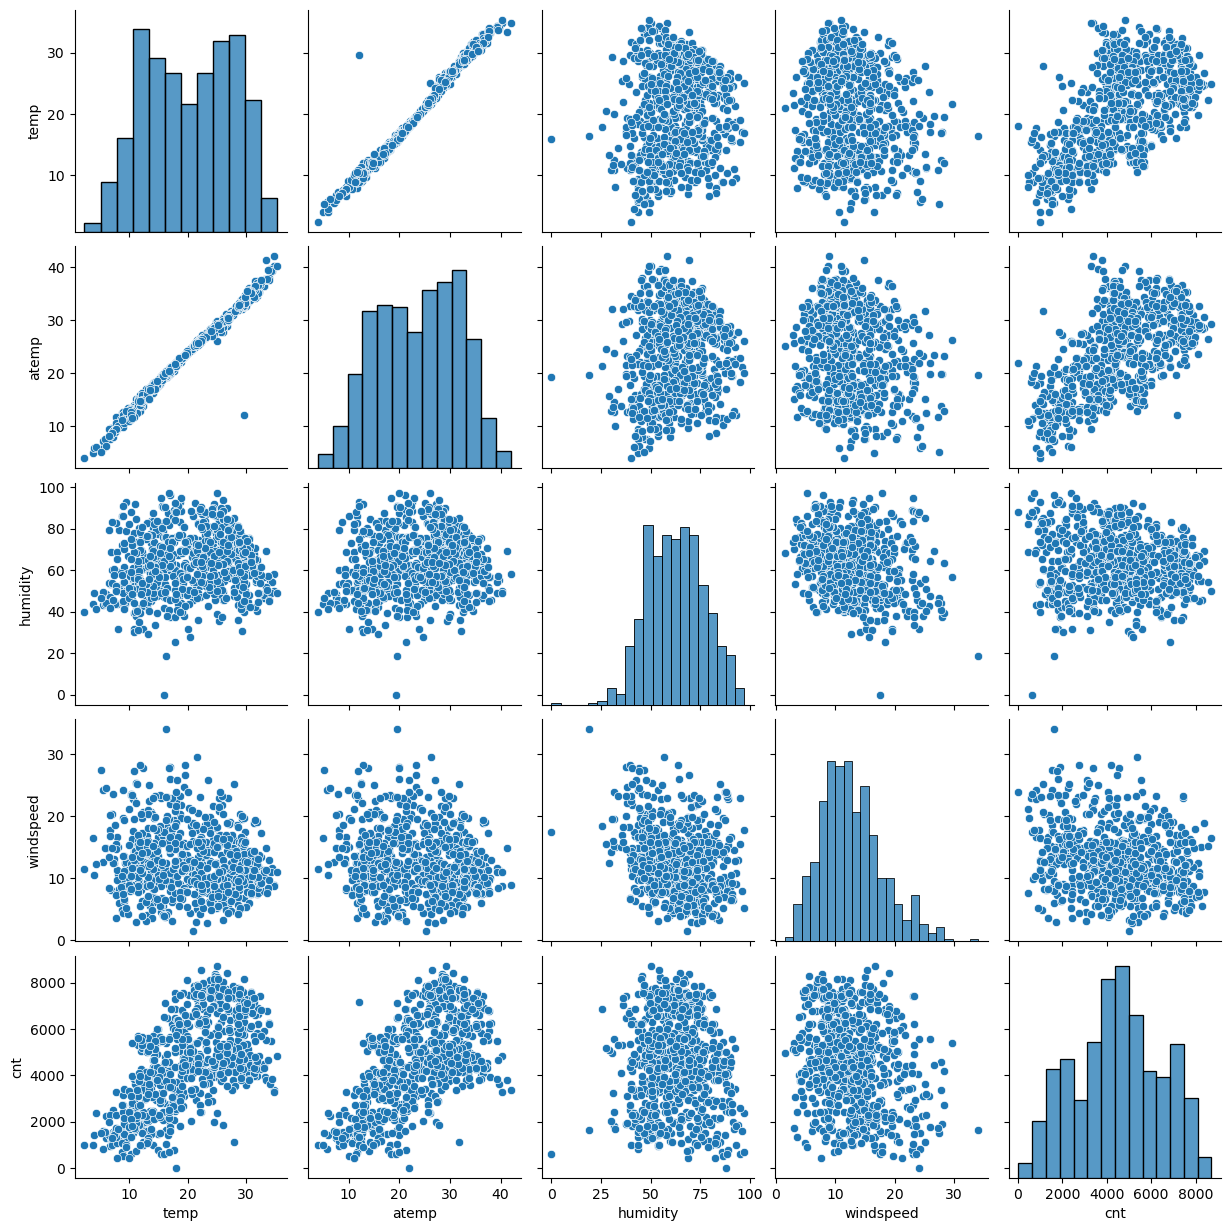

In [42]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=bike_sharing_data,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

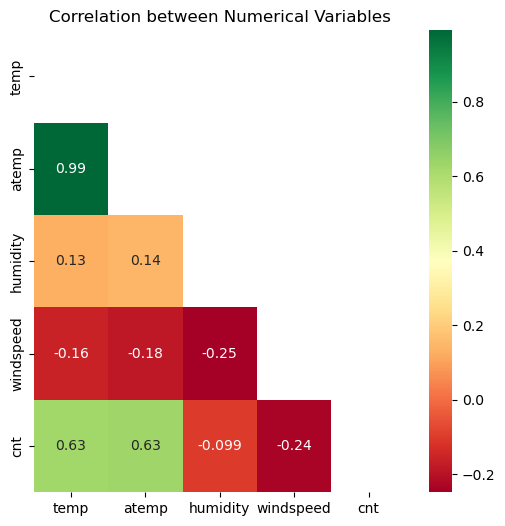

In [43]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bike_sharing_data[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(bike_sharing_data[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

#### A linear relationship exists between "temp" and "atemp." Both parameters can't be used simultaneously in the model due to multicollinearity. The decision on which parameter to retain will be guided by VIF (Variance Inflation Factor) and p-value concerning other variables.

## Step 3: Data Preparation

In [44]:
# Creating dummy variable for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bike_sharing_data.month,drop_first=True)
weekdays_df=pd.get_dummies(bike_sharing_data.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_sharing_data.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_sharing_data.season,drop_first=True)

In [45]:
bike_sharing_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,january,0,monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [46]:
# Merging the dataframe with the dummy variable dataset. 

bike_sharing_data_new = pd.concat([bike_sharing_data,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [47]:
bike_sharing_data_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,saturday,sunday,thursday,tuesday,wednesday,Misty,Rainy_Windy,spring,summer,winter
0,spring,0,january,0,monday,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,1,0,0
1,spring,0,january,0,tuesday,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,1,0,1,0,0
2,spring,0,january,0,wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,january,0,thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,january,0,friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [48]:
bike_sharing_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    int64  
 2   month        730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
 12  august       730 non-null    uint8  
 13  december     730 non-null    uint8  
 14  february     730 non-null    uint8  
 15  january      730 non-null    uint8  
 16  july         730 non-null    uint8  
 17  june         730 non-null    uint8  
 18  march        730 non-null    uint8  
 19  may     

In [49]:
# Removing redundant columns after creating dummy variables.

bike_sharing_data_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [50]:
# checking the head of the new dataframe

bike_sharing_data_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,Misty,Rainy_Windy,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
# checking the shape of the new dataframe

bike_sharing_data_new.shape

(730, 30)

In [52]:
# checking the column information of the new dataframe 

bike_sharing_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   atemp        730 non-null    float64
 5   humidity     730 non-null    float64
 6   windspeed    730 non-null    float64
 7   cnt          730 non-null    int64  
 8   august       730 non-null    uint8  
 9   december     730 non-null    uint8  
 10  february     730 non-null    uint8  
 11  january      730 non-null    uint8  
 12  july         730 non-null    uint8  
 13  june         730 non-null    uint8  
 14  march        730 non-null    uint8  
 15  may          730 non-null    uint8  
 16  november     730 non-null    uint8  
 17  october      730 non-null    uint8  
 18  september    730 non-null    uint8  
 19  monday  

## Step 4: Splitting the Data into Training and Testing Sets

In [53]:
# Dividing the DataFrame into training and testing sets.

np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing_data_new, train_size = 0.7, random_state = 100)

In [54]:
# checking the shape of the training datatset

df_train.shape

(510, 30)

In [55]:
# checking the shape of the testing datatset

df_test.shape

(220, 30)

In [56]:
# Utilizing MinMaxScaler to scale or normalize the features.

scaler = MinMaxScaler()

In [57]:
# Checking the first few rows of the dataset before applying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,Misty,Rainy_Windy,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,1,0,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,1,0,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,1,0,0,0,1,0,0,1,0


In [58]:
# Applying the scaler to all columns except those containing 'yes-no' and 'dummy' variables.

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [59]:
# Checking the initial rows of the dataset after applying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,Misty,Rainy_Windy,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,1,0,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,1,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,1,0,0,1,0


In [60]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,Misty,Rainy_Windy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.345098,0.029412,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.475867,0.169124,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


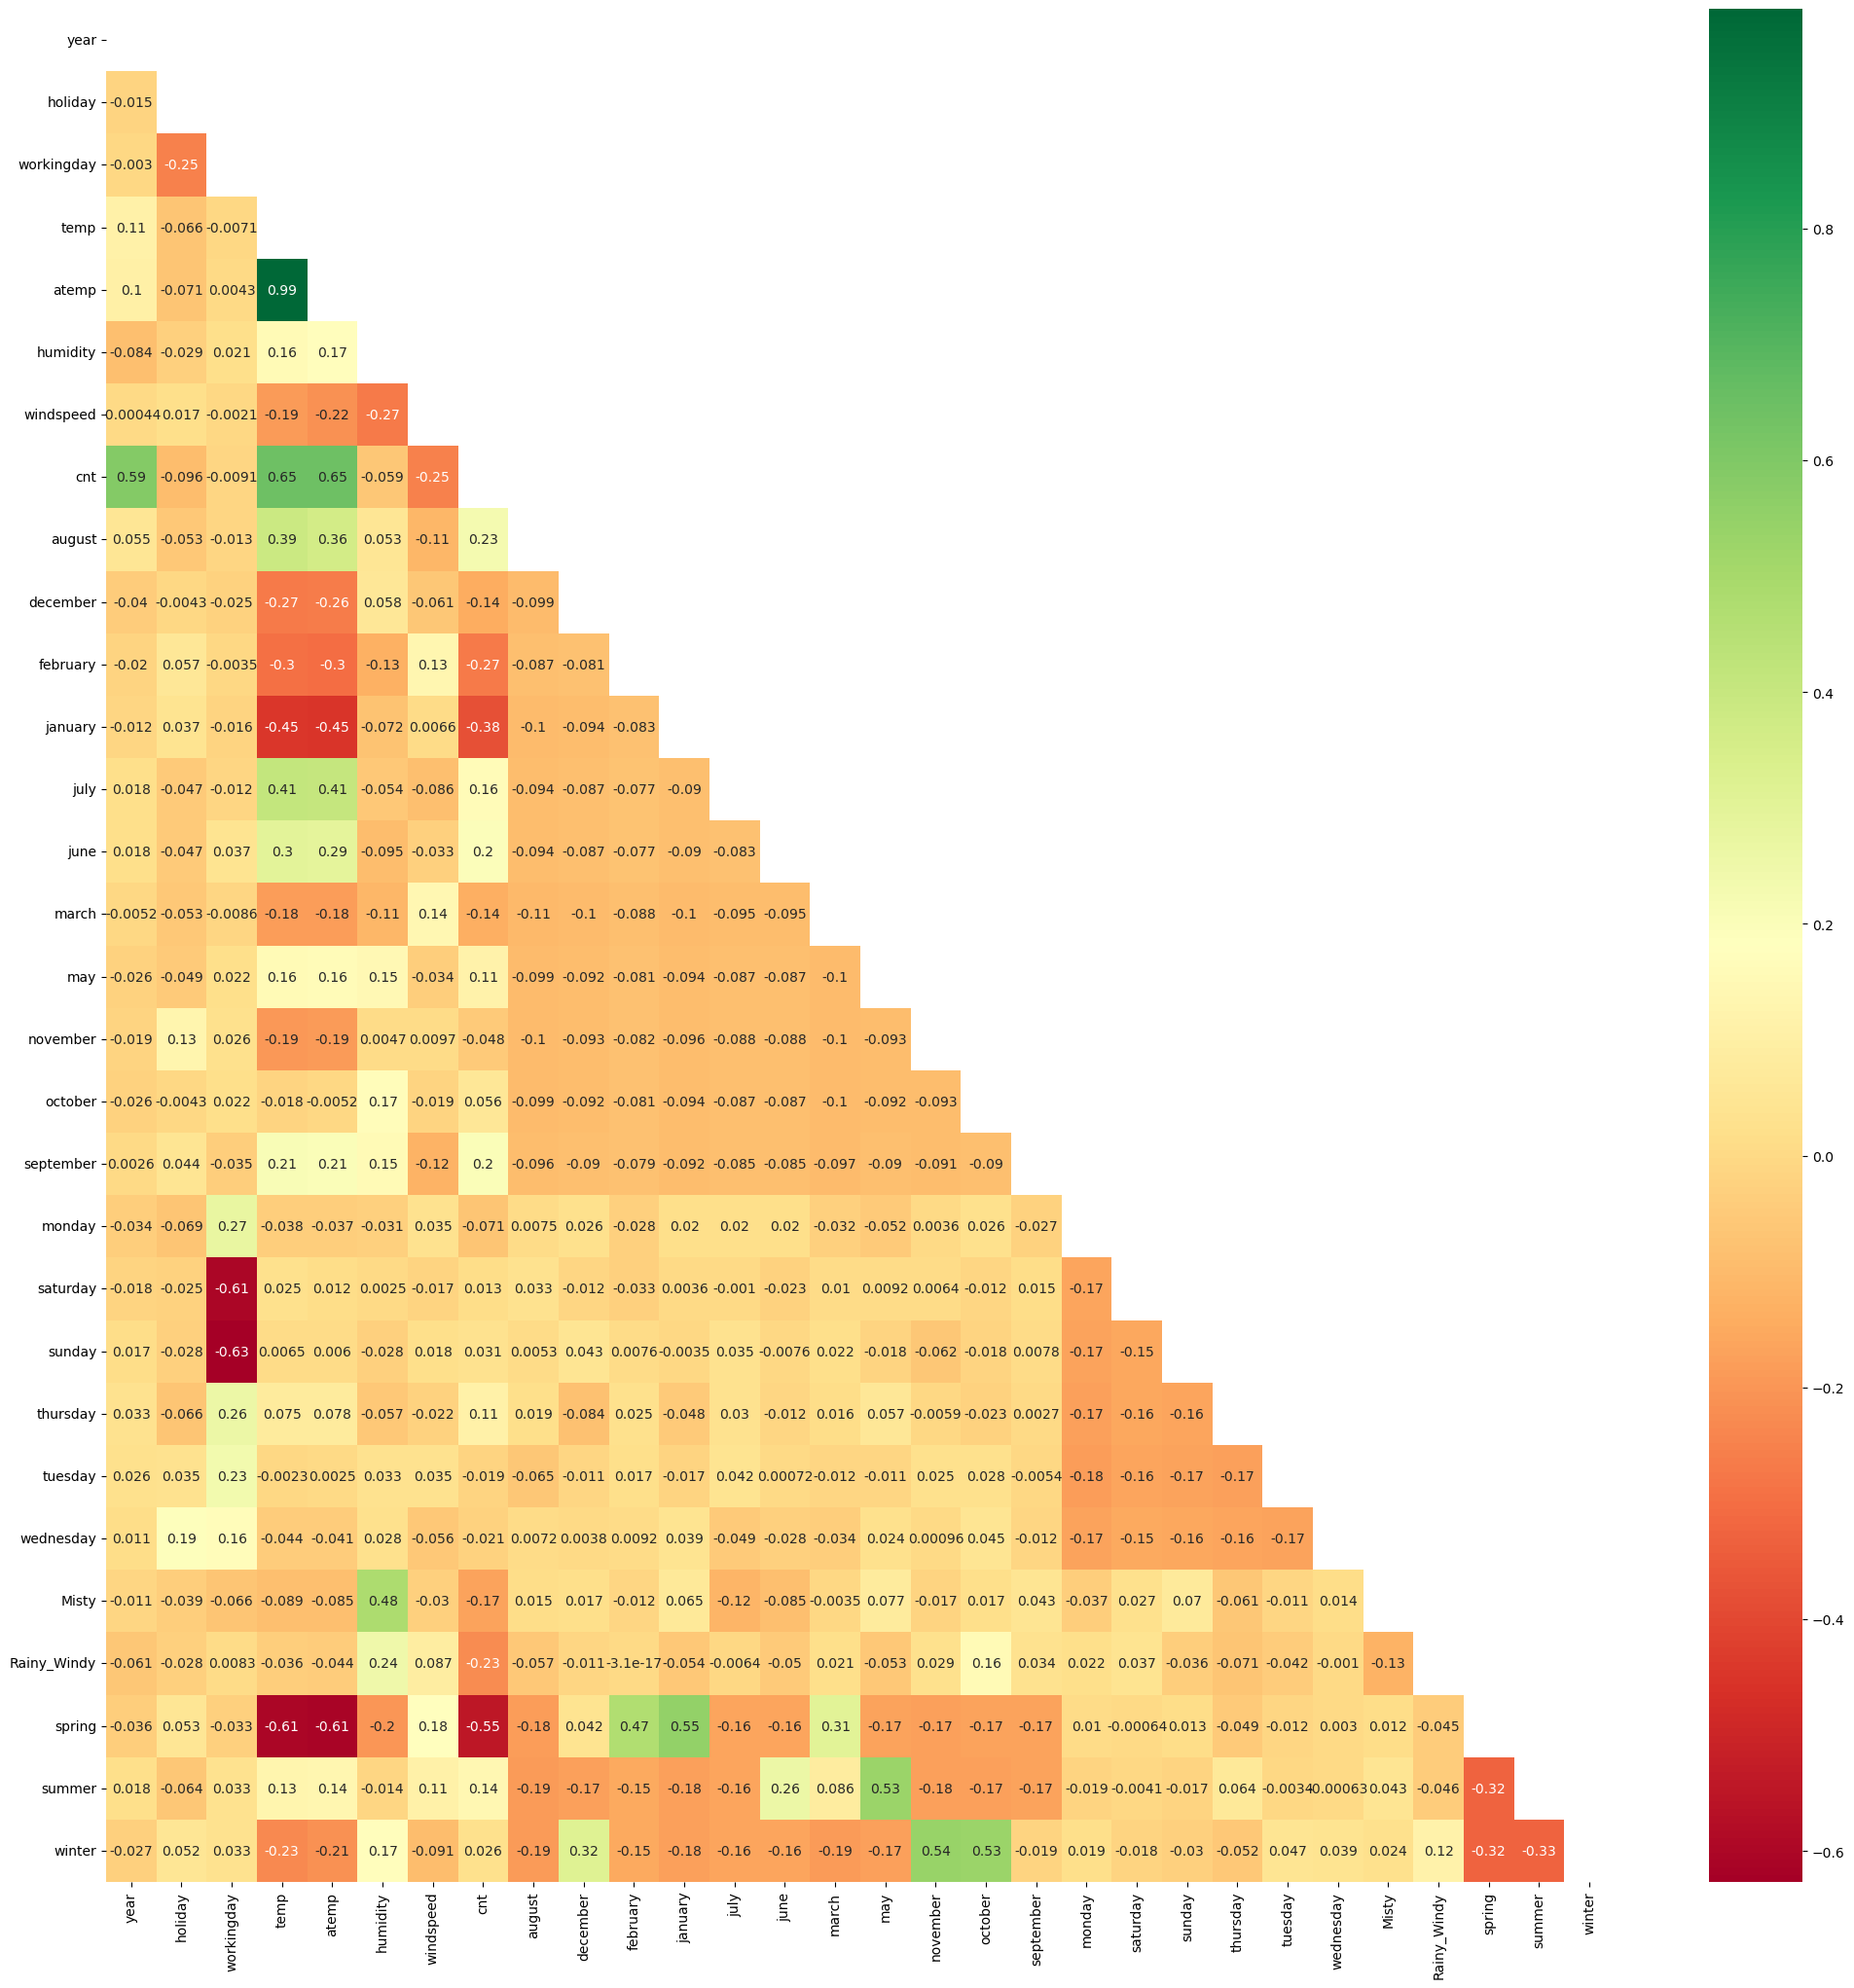

In [61]:
# Examining the correlation coefficients to identify highly correlated variables.

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

#### The count of bike shares ("cnt") appears to be correlated with the "year" variable and temperature ("temp"). Additionally, there is a correlation between misty weather and humidity. Notably, the Spring season aligns with January and February, the Summer season with May, and the Winter season with October and November, exhibiting notable correlations.

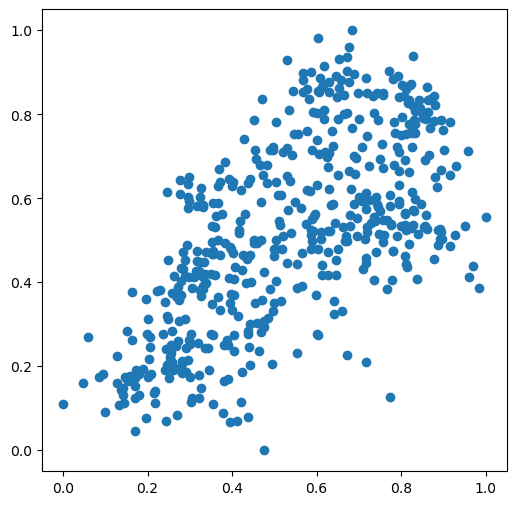

In [62]:
# Visualizing one of the correlations using a scatter plot to observe trends.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

In [63]:
# Constructing the linear regression model.

y_train = df_train.pop('cnt')
X_train = df_train

In [70]:
# Implementing recursive feature elimination.

lm = LinearRegression()
lm.fit(X_train, y_train)
num_features_to_keep = 15

rfe = RFE(lm, n_features_to_select=num_features_to_keep)
rfe = rfe.fit(X_train, y_train)

In [71]:
# Listing the variables selected in the top 15 list after recursive feature elimination.

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('august', False, 10),
 ('december', True, 1),
 ('february', False, 2),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('march', False, 15),
 ('may', False, 9),
 ('november', True, 1),
 ('october', False, 13),
 ('september', True, 1),
 ('monday', False, 8),
 ('saturday', False, 5),
 ('sunday', False, 6),
 ('thursday', False, 14),
 ('tuesday', False, 7),
 ('wednesday', False, 11),
 ('Misty', True, 1),
 ('Rainy_Windy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [72]:
# Choosing the variables selected through Recursive Feature Elimination (RFE) and 
# storing them in a column list.

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'december',
       'january', 'july', 'november', 'september', 'Misty', 'Rainy_Windy',
       'spring', 'summer', 'winter'],
      dtype='object')


In [73]:
# Examining which columns have been rejected during the feature selection process.

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'august', 'february', 'june', 'march', 'may',
       'october', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday'],
      dtype='object')

In [74]:
# A general function for calculating the Variance Inflation Factor (VIF) of variables.

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [75]:
# DataFrame containing the variables selected through Recursive Feature Elimination (RFE).

X_train_rfe = X_train[col]

In [76]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
10,Misty,2.32
0,year,2.09
8,november,1.85
6,january,1.75


humidity shows high VIF value.

## Step 5: Building a linear model

In [77]:
# Constructing the initial linear regression model.

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          8.15e-189
Time:                        15:48:09   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3197      0.036      8.859      

In [78]:
# Since humidity exhibits high Variance Inflation Factor (VIF) values,
# it may be prudent to drop it from the model.
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Execute the function to calculate the Variance Inflation Factor (VIF) for the updated model.
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,year,2.07
7,november,1.81
5,january,1.66
6,july,1.59
9,Misty,1.57


VIF values seems to be good now. But we will see if we can reduce further ?

In [79]:
# Constructing the second linear regression model after removing the variable with high VIF (humidity).

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          4.75e-186
Time:                        15:48:14   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2450      0.032      7.618      

In [81]:
# Considering the high p-value for the "nov" variable, it may be advisable to drop it from the model.
X_train_new = X_train_new.drop(['november'], axis = 1)

# Execute the function to compute the Variance Inflation Factor (VIF) for the updated model.
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,year,2.07
12,winter,2.05
5,january,1.65
6,july,1.59
8,Misty,1.57
7,september,1.34


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [82]:
# Constructing the third linear regression model.

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          2.74e-186
Time:                        15:48:34   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2283      0.031      7.310      

In [84]:
# Considering the elevated p-value for the "dec" variable,
# it may be reasonable to exclude it from the model.
X_train_new = X_train_new.drop(['december'], axis = 1)

# Execute the function to compute the Variance Inflation Factor (VIF) for the updated model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,year,2.07
11,winter,1.78
4,january,1.61
5,july,1.59
7,Misty,1.56
6,september,1.34


In [85]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          8.14e-187
Time:                        15:48:46   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2154      0.030      7.088      

In [87]:
# Given the high p-value for the "jan" variable, it might be appropriate to exclude it from the model.
X_train_new = X_train_new.drop(['january'], axis = 1)

# Execute the function to calculate the Variance Inflation Factor (VIF) for the updated model
# after removing the variable with a high p-value ("jan").
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,year,2.07
10,winter,1.78
4,july,1.58
6,Misty,1.55
5,september,1.34
7,Rainy_Windy,1.08


In [88]:
# Creating 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          5.06e-187
Time:                        15:48:55   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1994      0.030      6.746      

In [89]:
# Considering the elevated p-value for the "july" variable,
# it may be advisable to exclude it from the model.

X_train_new = X_train_new.drop(['july'], axis = 1)

# Execute the function to compute the Variance Inflation Factor (VIF) for the updated model 
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
5,Misty,1.55
4,september,1.23
6,Rainy_Windy,1.08
1,holiday,1.04


VIF value now seems to be good as it came below 5.

In [90]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          1.47e-186
Time:                        15:49:00   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1909      0.030      6.447      

#### The model lr_6 can be considered since it appears to have minimal multicollinearity among predictors, and the p-values for all predictors seem to be significant.

#### The F-Statistics value of 248.4, which exceeds 1, along with a p-value of 1.47e-186 (almost zero), indicates that the overall model is statistically significant.

In [91]:
# Checking the parameters and their coefficient values
lr_6.params

const          0.190855
year           0.234132
holiday       -0.096316
temp           0.477737
windspeed     -0.148098
september      0.090998
Misty         -0.078741
Rainy_Windy   -0.285031
spring        -0.055406
summer         0.062076
winter         0.094476
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [92]:
X_train_lm_6

,const,year,holiday,temp,windspeed,september,Misty,Rainy_Windy,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,1,0
111,1.0,0,0,0.345824,0.380981,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,1,0


In [93]:
y_train_pred = lr_6.predict(X_train_lm_6)

#### Normality of error terms

Text(0.5, 0, 'Errors')

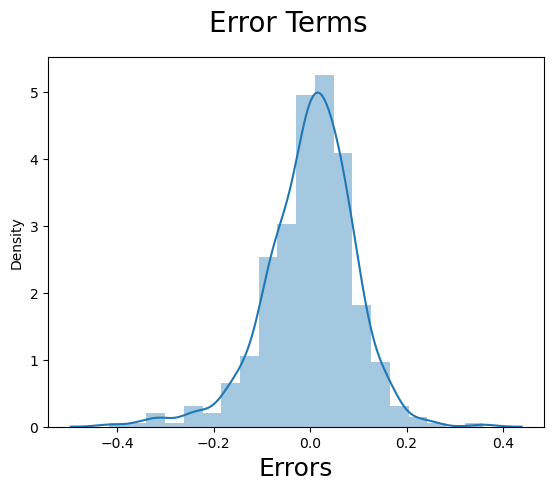

In [94]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

#### Multi Colinearity

In [95]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
5,Misty,1.55
4,september,1.23
6,Rainy_Windy,1.08
1,holiday,1.04


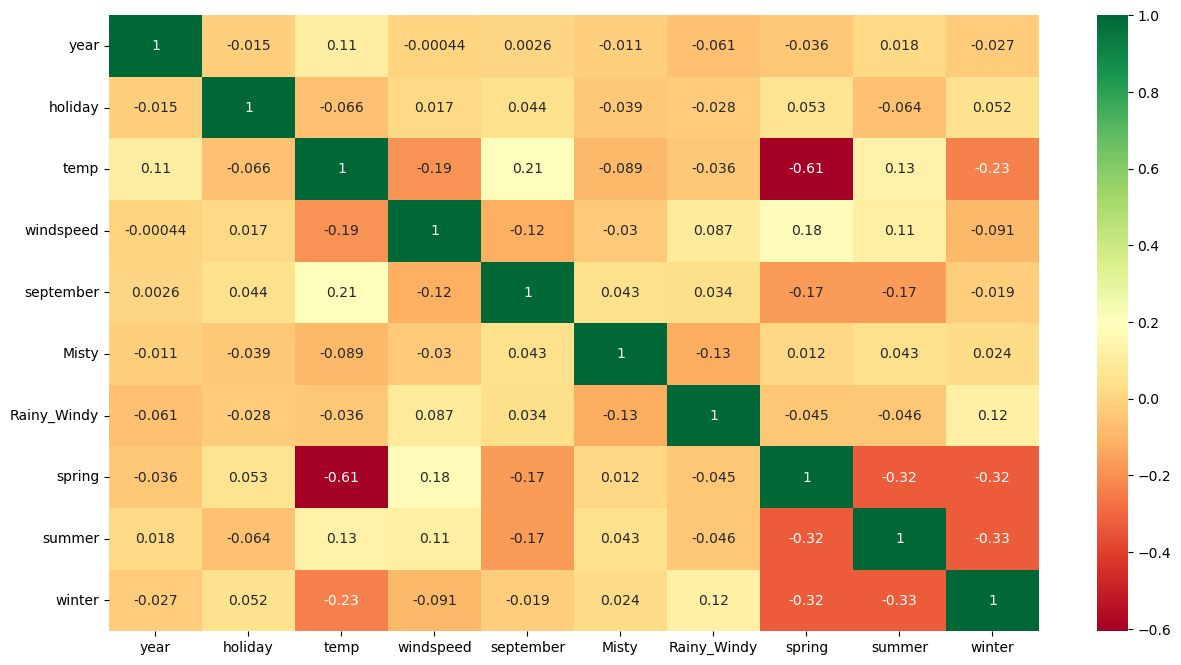

In [96]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

#### Linearity 

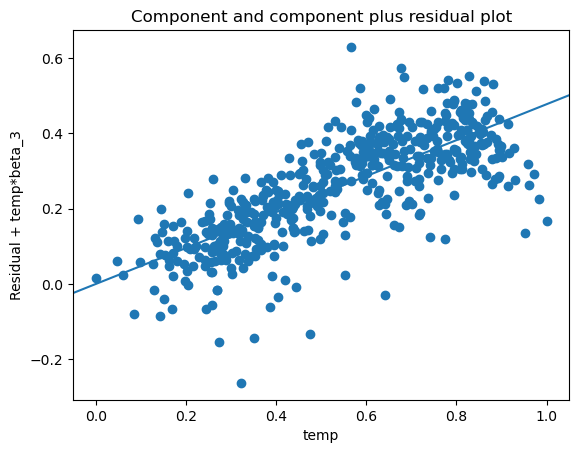

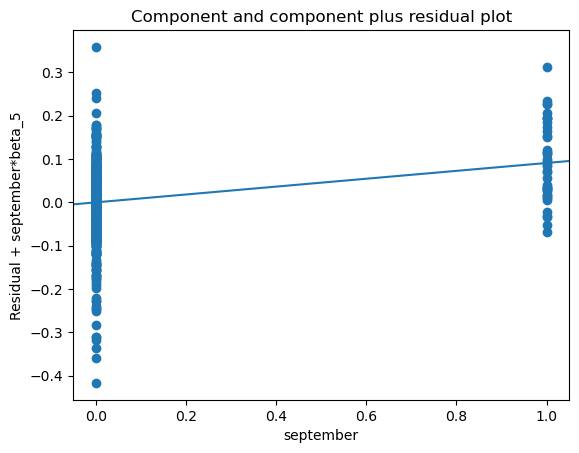

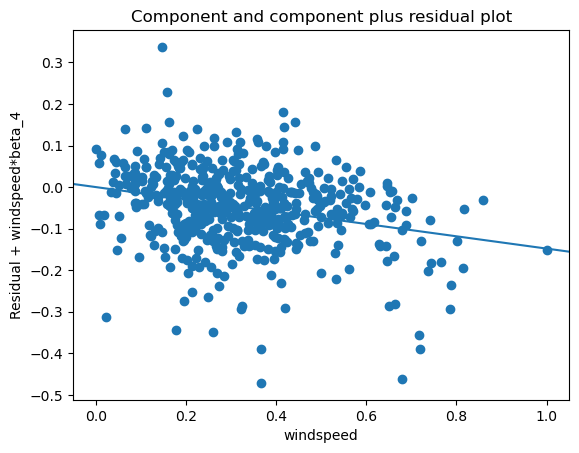

In [98]:
#Validating the linear relationship using a Component-Component plus Residual (CCPR) plot.
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'september')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

#### Homoscedasticity

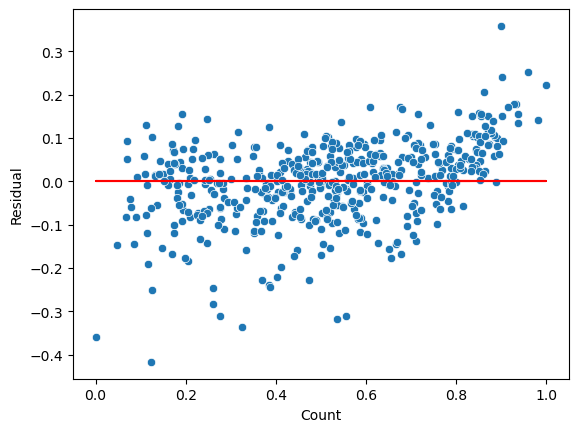

In [101]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred

# Specify x and y parameters for sns.scatterplot
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train, (y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()


No discernible pattern is evident from the residuals in the above plot.

#### Independence of residuals

Durbin-Watson value of final model lr_6 is 2.085, which signifies there is no autocorrelation.

## Step 7: Making Predictions Using the Final Model

With the model fitted and the normality of error terms checked, it's time to proceed with making predictions using the final, i.e., 6th model.

In [102]:
# Scaling the test dataset to maintain consistency with the scaled training data.

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,Misty,Rainy_Windy,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,1,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [103]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,Misty,Rainy_Windy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.318182,0.027273,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.466833,0.163248,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
y_test = df_test.pop('cnt')
X_test = df_test

In [105]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Including a constant variable in the test dataframe.
X_test_lm_6 = sm.add_constant(X_test)

In [106]:
y_pred = lr_6.predict(X_test_lm_6)

In [107]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

## Step 8: Model Evaluation

Let's now plot the graph for actual versus the predicted values.

Text(0, 0.5, 'y_pred')

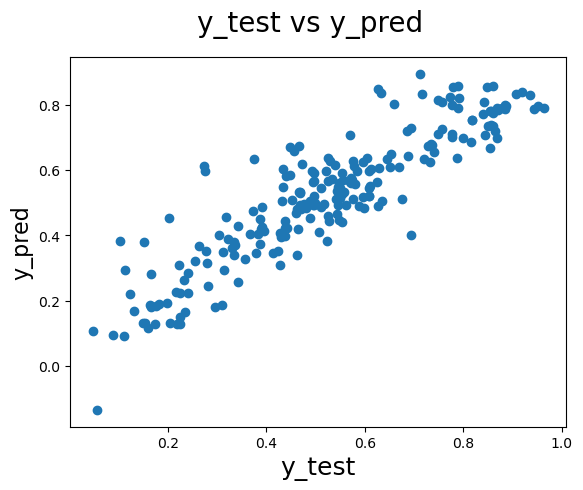

In [108]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [109]:
round(lr_6.params,4)

const          0.1909
year           0.2341
holiday       -0.0963
temp           0.4777
windspeed     -0.1481
september      0.0910
Misty         -0.0787
Rainy_Windy   -0.2850
spring        -0.0554
summer         0.0621
winter         0.0945
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.1909 + 0.2341  \times  year - 0.0963  \times  holiday + 0.4777 \times temp - 0.1481 \times windspeed + 0.0910 \times sep - 0.2850 \times Light_snowrain - 0.0787 \times Misty - 0.0554 \times spring + 0.0621 \times summer + 0.0945 \times winter $

In [113]:
# Calculating the Adjusted R^2 value for the test dataset to assess the model's performance.

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


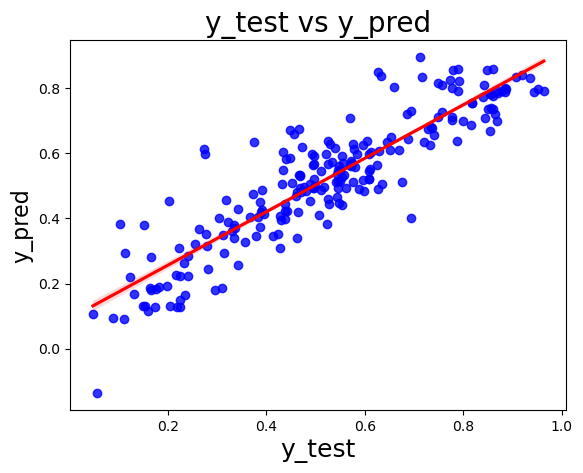

In [111]:
# Creating visualizations to assess the fit of the model on the test data.
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.833
    - Test dataset R^2           : 0.8038
    - Train dataset Adjusted R^2 : 0.829    
    - Test dataset Adjusted R^2  : 0.7944

#### The demand for bikes is influenced by the variables: year, holiday, temp, windspeed, september, Rainy_Windy, Misty, spring, summer, and winter.